In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer        

import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Data collection

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michiard/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-dataset


In [61]:
print(os.listdir(path))

df = pd.read_csv(path+'/train.csv')

print(df.head())

['sample_submission.csv', 'train.csv', 'test.csv']
       textID                                               text  \
0  28ac06f416                        good luck with your auction   
1  92098cf9a7  Hmm..You can`t judge a book by looking at its ...   
2  7858ff28f2   Hello, yourself. Enjoy London. Watch out for ...   
3  b0c9c67f32         We can`t even call you from belgium  sucks   
4  7b36e9e7a5                                 not so good mood..   

                                       selected_text sentiment  
0                        good luck with your auction  positive  
1  Hmm..You can`t judge a book by looking at its ...   neutral  
2                                    They`re mental.  negative  
3                                            m  suck  negative  
4                                 not so good mood..  negative  


In [62]:
print(df.info())
print("Columns: " + df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24732 entries, 0 to 24731
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         24732 non-null  object
 1   text           24732 non-null  object
 2   selected_text  24732 non-null  object
 3   sentiment      24732 non-null  object
dtypes: object(4)
memory usage: 773.0+ KB
None
Index(['Columns: textID', 'Columns: text', 'Columns: selected_text',
       'Columns: sentiment'],
      dtype='object')
(24732, 4)


In [63]:
df.describe(include='all')

,textID,text,selected_text,sentiment
count,24732,24732,24732,24732
unique,24732,24732,20298,3
top,28ac06f416,good luck with your auction,love,neutral
freq,1,1,174,10018


In [64]:
df['sentiment'].value_counts()

sentiment
neutral     10018
positive     7711
negative     7003
Name: count, dtype: int64

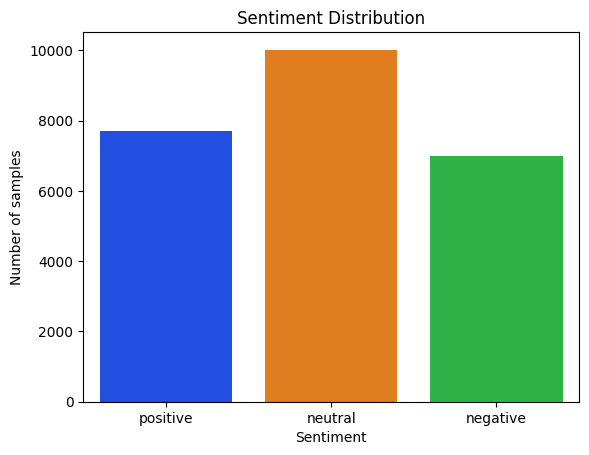

In [65]:
# Plot
sns.countplot(x='sentiment', data=df, palette='bright')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of samples')
plt.show()

# Preprocessing

## Text cleansing

In [66]:
'''
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


# Carica modello spaCy
nlp = spacy.load("en_core_web_sm")

# Stopwords personalizzate (manteniamo le negazioni)
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor'}
stop_words = stop_words.difference(negations)

def preprocess_text(text):
    # Rimuove punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizzazione
    tokens = word_tokenize(text.lower())
    
    # Lemmatizzazione con spaCy (sul testo completamente lowercase)
    doc = nlp(" ".join(tokens).lower())
    lemmatized_tokens = [token.lemma_.lower() for token in doc]

    
    # Rimozione stopwords
    final_tokens = [token for token in lemmatized_tokens if token not in stop_words and token.strip()]
    
    return final_tokens

df['removed_stop_words'] = df['text'].apply(lambda x: preprocess_text(x))
'''

'\nimport nltk\nimport spacy\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nimport string\n\n\n# Carica modello spaCy\nnlp = spacy.load("en_core_web_sm")\n\n# Stopwords personalizzate (manteniamo le negazioni)\nstop_words = set(stopwords.words(\'english\'))\nnegations = {\'no\', \'not\', \'nor\'}\nstop_words = stop_words.difference(negations)\n\ndef preprocess_text(text):\n    # Rimuove punteggiatura\n    text = text.translate(str.maketrans(\'\', \'\', string.punctuation))\n    \n    # Tokenizzazione\n    tokens = word_tokenize(text.lower())\n    \n    # Lemmatizzazione con spaCy (sul testo completamente lowercase)\n    doc = nlp(" ".join(tokens).lower())\n    lemmatized_tokens = [token.lemma_.lower() for token in doc]\n\n    \n    # Rimozione stopwords\n    final_tokens = [token for token in lemmatized_tokens if token not in stop_words and token.strip()]\n    \n    return final_tokens\n\ndf[\'removed_stop_words\'] = df[\'text\'].apply(lambda x: preprocess

In [67]:
!pip install spacy nltk num2words
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.2 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [68]:
import re
import string
import unicodedata
import nltk
import spacy
from nltk.corpus import stopwords
from num2words import num2words

# Downloads if needed
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Custom stopwords keeping negations
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor'}
stop_words = stop_words.difference(negations)

def preprocess_text(text):
    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 2. Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # 3. Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
    
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Convert numbers to words
    def replace_numbers(match):
        return num2words(match.group())
    text = re.sub(r'\b\d+\b', replace_numbers, text)
    
    # 6. Lowercase
    text = text.lower()
    
    # 7. Lemmatize and tokenize with spaCy
    doc = nlp(text)
    
    # 8. Remove stopwords and non-alpha tokens
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.lemma_.lower() not in stop_words and token.lemma_.isalpha()
    ]
    
    return tokens


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
df['removed_stop_words'] = df['text'].apply(lambda x: preprocess_text(x))

In [70]:
df.sample(10)

,textID,text,selected_text,sentiment,removed_stop_words
8922,a9a192ea57,I have to spend lots of our money on a new b...,I have to spend lots of our money on a new bo...,neutral,"[spend, lot, money, new, boilergreat, not, luc..."
21363,793b9c8924,_perfect I`m trying to self learn photoshop bu...,it`s not going so well!,negative,"[perfect, try, self, learn, photoshop, not, go..."
18761,f2eb332205,No one is bringing snacks,No one is bringing snacks,neutral,"[no, one, bring, snack]"
13744,1da15ab6f5,Yes I did see Mitch Hedberg and the whole flo...,g. He`s hilarious. I <3 him. Poor,neutral,"[yes, see, mitch, hedberg, whole, floss, thing..."
19818,7611dbc581,"Haha, that`s great. Yeah, Zachary Quinto as S...",awesome,positive,"[haha, great, yeah, zachary, quinto, spock, re..."
3285,132d174785,yea. I was off today luv. I shudve told u. ...,yea. I was off today luv. I shudve told u. a...,positive,"[yea, today, luv, shudve, tell, u, anything, e..."
5637,cf52aa0a38,Im soooooooo **** hungry!! wat 2 eat??,Im soooooooo **** hungry!! wat 2 eat??,neutral,"[soooooooo, hungry, wat, two, eat]"
11515,30fbdcc263,Did you know if you want to stay cool all day ...,Did you know if you want to stay cool all day ...,neutral,"[know, want, stay, cool, day, use, shower, gel..."
121,56a6f86f09,"yea it looks good, the flower i mean.","yea it looks good,",positive,"[yea, look, good, flower, mean]"
8184,7a10fb8dd0,is it a worldwide number? caause for some rea...,is it a worldwide number? caause for some reas...,neutral,"[worldwide, number, caause, reason, phone, not..."


In [71]:
df[df['removed_stop_words'].apply(lambda tokens: 'mother' in tokens)]


,textID,text,selected_text,sentiment,removed_stop_words
19,fe54c45844,can`t believe I just drove all the way back to...,HAPPY,positive,"[not, believe, drive, way, back, schoolwhateve..."
52,f22dd850f7,happy mother`s day to all the moms out there. ...,happy mother`s day,positive,"[happy, mother, day, mom, hope, never, join, c..."
63,4e53704d24,in about 30 minutes Happy Mothers Day to alll ...,Happy,positive,"[thirty, minute, happy, mother, day, alll, ama..."
93,ee91ba580f,Happy Mother`s Day ~ Did you watch SNL? If n...,Happy Mother`s Day,positive,"[happy, mother, day, watch, snl, not, u, miss,..."
110,8976579aa1,"Mom, where ever you are; Happy Mothers day",Happy,positive,"[mom, ever, happy, mother, day]"
...,...,...,...,...,...
24548,dbb2960dc7,Searching my home for a few things to cook the...,Searching my home for a few things to cook the...,neutral,"[search, home, thing, cook, dinner, evening, m..."
24588,ba0f683c89,"Wishing you a very Happy Mother`s Day, Carina...",Happy,positive,"[wish, happy, mother, day, carina, hugsjoy]"
24626,563148673a,happy mothers day,happy mo,positive,"[happy, mother, day]"
24691,a1c8f1e077,Happy Mothers Day! i hope tom got you somethi...,Happy Mothers Day!,positive,"[happy, mother, day, hope, tom, get, something..."


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the unique sentiment classes you want to generate clouds for
sentiments = ['neutral', 'positive', 'negative']

# Loop through each class
for sentiment in sentiments:
    # Filter the DataFrame by sentiment class
    subset = df[df['sentiment'] == sentiment]

    # Flatten the token lists into a single string
    all_words = ' '.join([' '.join(tokens) for tokens in subset['removed_stop_words']])

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the word cloud (optional)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} WordCloud', fontsize=16)

    # Save the figure locally
    filename = f"{sentiment}_wordcloud.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()  # Close the plot to avoid displaying all of them in notebook

    print(f"Saved: {filename}")


Saved: neutral_wordcloud.png
Saved: positive_wordcloud.png
Saved: negative_wordcloud.png


# TF-IDF + Logistic regression (one-vs-rest) vs SVM (one-vs-rest) vs Random Forest vs Multinomial Naive Bayes

## Step 1: Unisci i token in stringhe 

In [78]:
df['processed_text'] = df['removed_stop_words'].apply(lambda tokens: ' '.join(tokens))

## Step 2: TF-IDF Vectorization

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crea un vettorizzatore TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # puoi anche rimuovere max_features o aumentarlo

# Trasforma il testo in una matrice numerica
X = vectorizer.fit_transform(df['processed_text'])

# Target
y = df['sentiment']

## Step 3: Train/Test Split

In [80]:
from sklearn.model_selection import train_test_split

# Primo split: 70% training, 30% temporaneo
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Secondo split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Controllo delle proporzioni
print("Train:", X_train.shape)
print("Val  :", X_val.shape)
print("Test :", X_test.shape)


Train: (17312, 5000)
Val  : (3710, 5000)
Test : (3710, 5000)


## STEP 4: Funzione comune per allenamento e valutazione

In [83]:
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    print(f"\n{name} — Training...")
    model.fit(X_train, y_train)
    
    # Validation
    y_val_pred = model.predict(X_val)
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    print(f"\n{name} — VALIDATION")
    print("F1 Macro:", val_f1)
    print(classification_report(y_val, y_val_pred))

    # Test
    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    print(f"\n{name} — TEST")
    print("F1 Macro:", test_f1)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## STEP 5: Modelli da confrontare


Logistic Regression — Training...

Logistic Regression — VALIDATION
F1 Macro: 0.6872933268852023
              precision    recall  f1-score   support

    negative       0.73      0.60      0.65      1050
     neutral       0.62      0.74      0.67      1503
    positive       0.78      0.69      0.73      1157

    accuracy                           0.69      3710
   macro avg       0.71      0.68      0.69      3710
weighted avg       0.70      0.69      0.69      3710


Logistic Regression — TEST
F1 Macro: 0.6915487146963825
              precision    recall  f1-score   support

    negative       0.73      0.60      0.66      1051
     neutral       0.62      0.76      0.68      1503
    positive       0.79      0.69      0.74      1156

    accuracy                           0.69      3710
   macro avg       0.71      0.68      0.69      3710
weighted avg       0.70      0.69      0.69      3710



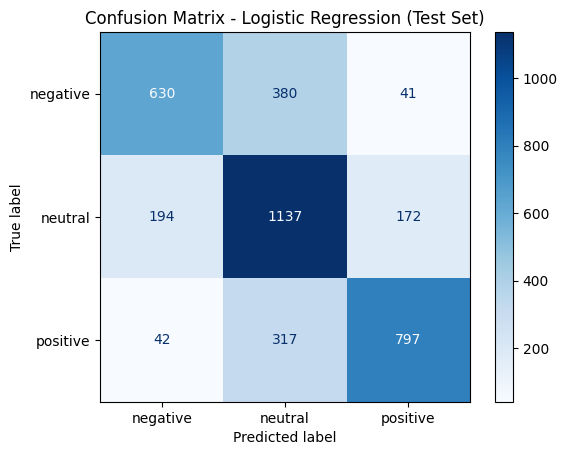


SVM (Linear) — Training...

SVM (Linear) — VALIDATION
F1 Macro: 0.6634277052149719
              precision    recall  f1-score   support

    negative       0.67      0.60      0.64      1050
     neutral       0.62      0.68      0.65      1503
    positive       0.72      0.69      0.71      1157

    accuracy                           0.66      3710
   macro avg       0.67      0.66      0.66      3710
weighted avg       0.67      0.66      0.66      3710


SVM (Linear) — TEST
F1 Macro: 0.675934488787898
              precision    recall  f1-score   support

    negative       0.68      0.63      0.66      1051
     neutral       0.62      0.68      0.65      1503
    positive       0.74      0.70      0.72      1156

    accuracy                           0.67      3710
   macro avg       0.68      0.67      0.68      3710
weighted avg       0.68      0.67      0.67      3710



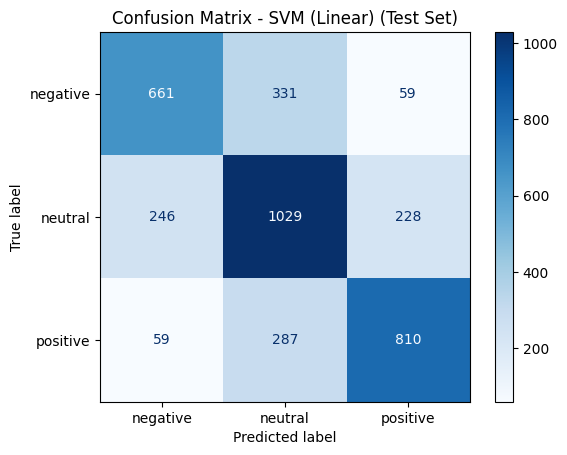


Random Forest — Training...

Random Forest — VALIDATION
F1 Macro: 0.699992465688274
              precision    recall  f1-score   support

    negative       0.73      0.61      0.67      1050
     neutral       0.64      0.74      0.69      1503
    positive       0.76      0.73      0.75      1157

    accuracy                           0.70      3710
   macro avg       0.71      0.69      0.70      3710
weighted avg       0.71      0.70      0.70      3710


Random Forest — TEST
F1 Macro: 0.712524930412942
              precision    recall  f1-score   support

    negative       0.75      0.62      0.68      1051
     neutral       0.65      0.75      0.70      1503
    positive       0.78      0.75      0.76      1156

    accuracy                           0.71      3710
   macro avg       0.73      0.71      0.71      3710
weighted avg       0.72      0.71      0.71      3710



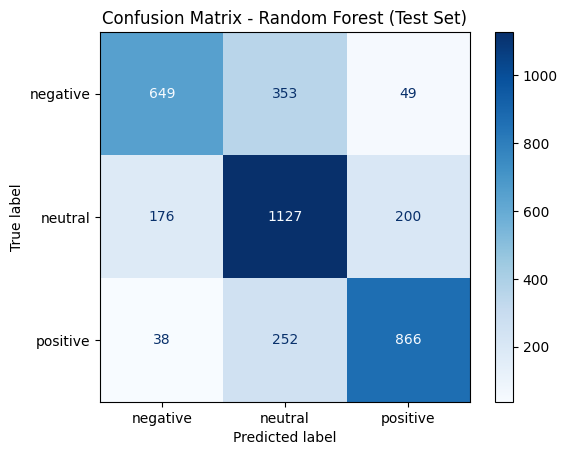


Multinomial Naive Bayes — Training...

Multinomial Naive Bayes — VALIDATION
F1 Macro: 0.6256374796174667
              precision    recall  f1-score   support

    negative       0.72      0.46      0.57      1050
     neutral       0.56      0.78      0.65      1503
    positive       0.74      0.60      0.66      1157

    accuracy                           0.63      3710
   macro avg       0.67      0.61      0.63      3710
weighted avg       0.66      0.63      0.63      3710


Multinomial Naive Bayes — TEST
F1 Macro: 0.6284423972577574
              precision    recall  f1-score   support

    negative       0.72      0.50      0.59      1051
     neutral       0.55      0.76      0.64      1503
    positive       0.76      0.58      0.66      1156

    accuracy                           0.63      3710
   macro avg       0.67      0.61      0.63      3710
weighted avg       0.66      0.63      0.63      3710



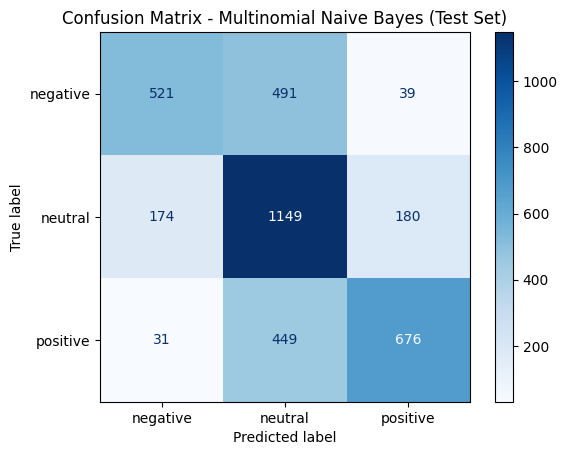

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
evaluate_model(log_model, "Logistic Regression")

# SVM
svm_model = LinearSVC()
evaluate_model(svm_model, "SVM (Linear)")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")

# Naive Bayes
nb_model = MultinomialNB()
evaluate_model(nb_model, "Multinomial Naive Bayes")


## Risultati

Logistic Regression — TEST
F1 Macro: 0.6915487146963825

SVM (Linear) — TEST
F1 Macro: 0.675934488787898

Random Forest — TEST
F1 Macro: 0.712524930412942

Multinomial Naive Bayes — TEST
F1 Macro: 0.6284423972577574


### commenti per report:

Svantaggi TF_IDF:
* Non capisce il contesto o il significato delle parole
* Non gestisce bene sinonimi o ironia

Vantaggi:
* Facile da implementare
* Leggero e veloce
